Importing Required Libraries

In [2]:
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

Loading the Data

In [3]:
train_data = pd.read_csv('../Raw_data/train.csv')
test_data = pd.read_csv('../Raw_data/test.csv')

Visualising the data

In [89]:
train_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5466,2012-01-02 21:00:00,1,1,0,2,9.84,10.605,41,22.0028,3,63,66
10133,2012-11-07 14:00:00,4,0,1,2,13.12,14.395,53,23.9994,19,142,161
4389,2011-10-14 22:00:00,4,0,1,1,18.86,22.725,59,15.0013,20,123,143
7475,2012-05-10 20:00:00,2,0,1,1,21.32,25.000,40,22.0028,59,315,374
4726,2011-11-10 00:00:00,4,0,1,1,16.40,20.455,87,0.0000,0,24,24


In [90]:
test_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
2199,2011-09-23 04:00:00,4,0,1,3,24.60,25.000,100,0.0000
237,2011-01-31 04:00:00,1,0,1,1,8.20,9.850,59,15.0013
5796,2012-10-24 08:00:00,4,0,1,2,21.32,25.000,83,7.0015
1616,2011-07-22 08:00:00,3,0,1,2,34.44,42.425,63,11.0014
2425,2011-10-21 14:00:00,4,0,1,1,21.32,25.000,42,19.9995


Understanding the data fields and their object types

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [92]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [93]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


Dropping the duplicate values from the data

In [94]:
train_data.drop_duplicates(inplace= True)

Using boxplot to understand the distribution of data

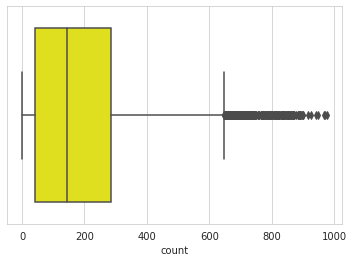

In [95]:
sns.boxplot(x='count',data=train_data, color='yellow')
plt.show()

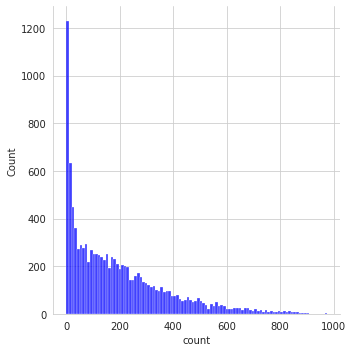

In [96]:
sns.set_style('whitegrid')
sns.displot(train_data['count'],bins=100,color='blue')
plt.show()

In [97]:
fields = [i for i in train_data]
fields=fields[5:9]
print(fields)

['temp', 'atemp', 'humidity', 'windspeed']


Understanding the raltion between two variables using scatter plot

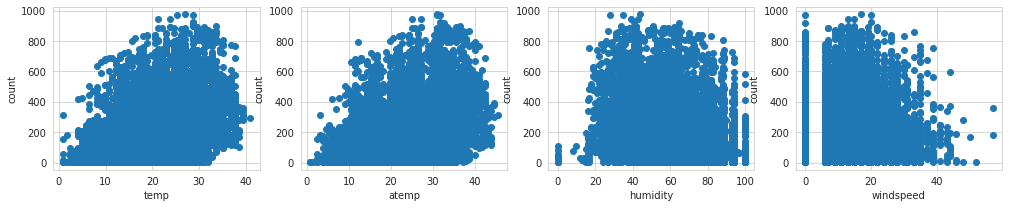

In [98]:
fig = plt.figure(figsize=(17,3))
for i,f in enumerate(fields):
    ax=fig.add_subplot(1,4,i+1)
    ax.scatter(train_data[f],train_data['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    
plt.show()

Using boxplot to understand the relation with count and other parameters

<AxesSubplot:xlabel='workingday', ylabel='count'>

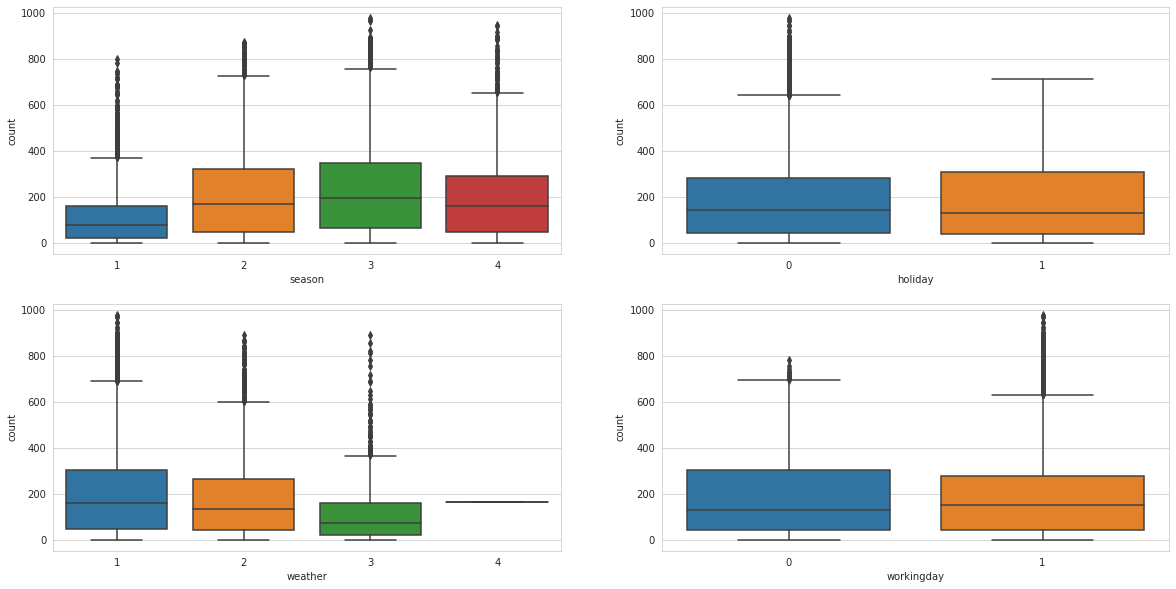

In [99]:
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=train_data,y='count', x='season', ax=axes[0][0])
sns.boxplot(data=train_data,y='count', x='holiday', ax=axes[0][1])
sns.boxplot(data=train_data,y='count', x='weather', ax=axes[1][0])
sns.boxplot(data=train_data,y='count', x='workingday', ax=axes[1][1])



Understanding the above data lineplot to understand the patterns

<AxesSubplot:xlabel='workingday', ylabel='count'>

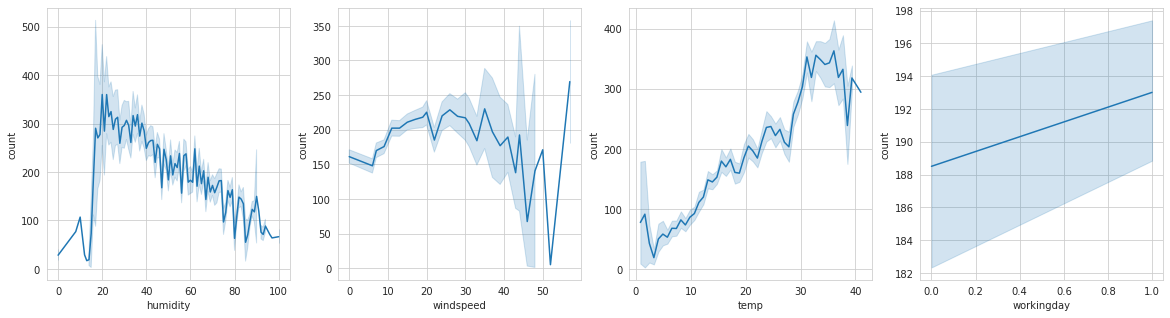

In [100]:
fig, axs = plt.subplots(1,4)
fig.set_size_inches(20,5)
sns.lineplot(data=train_data, x="humidity", y="count", ax=axs[0])
sns.lineplot(data=train_data, x="windspeed", y="count", ax=axs[1])
sns.lineplot(data=train_data, x="temp", y="count", ax=axs[2])
sns.lineplot(data=train_data, x="workingday", y="count", ax=axs[3])

Heatmap to understand which columns are weighted mostly on to the count

<AxesSubplot:>

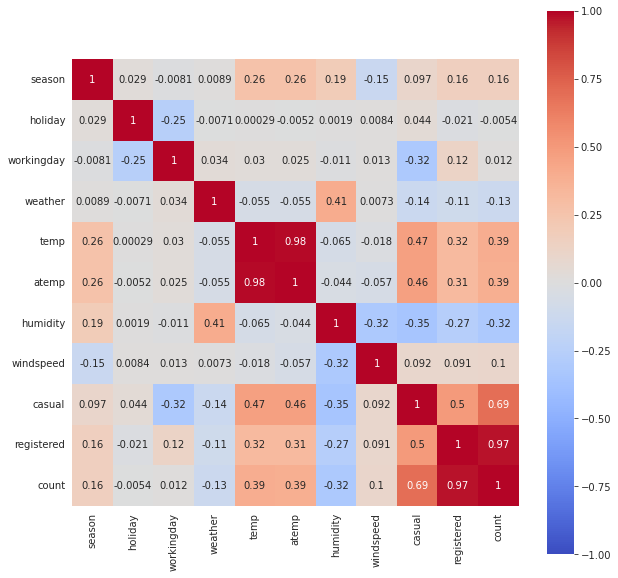

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr('pearson'),vmin=-1, vmax=1, cmap ='coolwarm', annot = True, square = True)

Converting the datetime from object to datetime for further analysis

In [102]:
train_data['datetime']= pd.to_datetime(train_data['datetime'])
test_data['datetime']= pd.to_datetime(test_data['datetime'])

In [103]:
train_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
297,2011-01-13 20:00:00,1,0,1,1,6.56,7.575,47,15.0013,0,64,64
6593,2012-03-12 00:00:00,1,0,1,1,15.58,19.695,54,12.9980,4,20,24
7260,2012-05-01 21:00:00,2,0,1,1,26.24,30.305,65,8.9981,31,251,282
8019,2012-06-14 12:00:00,2,0,1,2,27.06,31.060,61,15.0013,55,210,265
3989,2011-09-17 06:00:00,3,0,0,2,18.86,22.725,72,15.0013,5,17,22


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.3 MB


In [105]:
test_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4862,2012-07-20 10:00:00,3,0,1,2,28.70,33.335,79,11.0014
943,2011-04-28 07:00:00,2,0,1,2,26.24,29.545,78,30.0026
3940,2012-03-28 00:00:00,2,0,1,1,14.76,16.665,40,19.0012
3224,2012-01-20 01:00:00,1,0,1,1,10.66,13.635,48,8.9981
4944,2012-07-23 20:00:00,3,0,1,1,31.16,35.605,62,11.0014


In [106]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


Spliting the datetime values into different variables

In [107]:
train_data['year'] = pd.to_datetime(train_data['datetime']).dt.year
train_data['month'] = pd.to_datetime(train_data['datetime']).dt.month
train_data['day'] = pd.to_datetime(train_data['datetime']).dt.day
train_data['dayofweek']= pd.to_datetime(train_data['datetime']).dt.dayofweek
train_data['hour'] = pd.to_datetime(train_data['datetime']).dt.hour


In [108]:
train_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
3919,2011-09-14 08:00:00,3,0,1,1,25.42,28.79,83,11.0014,33,396,429,2011,9,14,2,8
4180,2011-10-06 05:00:00,4,0,1,1,17.22,21.21,62,12.9980,0,24,24,2011,10,6,3,5
9274,2012-09-09 19:00:00,3,0,0,1,27.06,31.06,36,16.9979,134,362,496,2012,9,9,6,19
10795,2012-12-16 05:00:00,4,0,0,2,13.94,18.18,87,0.0000,0,9,9,2012,12,16,6,5
8539,2012-07-17 04:00:00,3,0,1,1,29.52,34.09,62,0.0000,0,7,7,2012,7,17,1,4


Dropping the datetime and not required fields from the dataframe

In [109]:
train_data = train_data.drop('datetime',axis=1)
train_data = train_data.drop(['casual','registered'],axis=1)


In [110]:
train_data.sample(5)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
2259,2,0,1,1,29.52,32.575,38,7.0015,15,2011,6,2,3,1
5013,4,0,1,1,13.12,15.150,53,19.0012,95,2011,12,2,4,23
10395,4,0,0,1,16.40,20.455,62,22.0028,447,2012,11,18,6,13
230,1,0,1,1,5.74,6.820,59,12.9980,38,2011,1,10,0,21
5272,4,0,1,1,13.94,15.910,42,15.0013,382,2011,12,13,1,18


Spliting the datetime for test data set as done for the train data set

In [111]:
test_data['year'] = pd.to_datetime(test_data['datetime']).dt.year
test_data['month'] = pd.to_datetime(test_data['datetime']).dt.month
test_data['day'] = pd.to_datetime(test_data['datetime']).dt.day
test_data['dayofweek']= pd.to_datetime(test_data['datetime']).dt.dayofweek
test_data['hour'] = pd.to_datetime(test_data['datetime']).dt.hour

In [112]:
test_data = test_data.drop('datetime',axis=1)

In [113]:
test_data.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
1463,3,0,0,1,28.70,32.575,54,6.0032,2011,6,26,6,23
1065,2,0,0,1,25.42,30.305,69,7.0015,2011,5,22,6,9
1192,2,0,1,2,31.16,34.850,55,26.0027,2011,5,27,4,16
4874,3,0,1,2,25.42,28.790,83,12.9980,2012,7,20,4,22
3847,2,0,0,1,22.14,25.760,77,7.0015,2012,3,24,5,3


In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  dayofweek   10886 non-null  int64  
 13  hour        10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.5 MB


In [115]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int64  
 9   month       6493 non-null   int64  
 10  day         6493 non-null   int64  
 11  dayofweek   6493 non-null   int64  
 12  hour        6493 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 659.6 KB


See the patterns using barplot on yearly, monthly and hourly

<AxesSubplot:xlabel='hour', ylabel='count'>

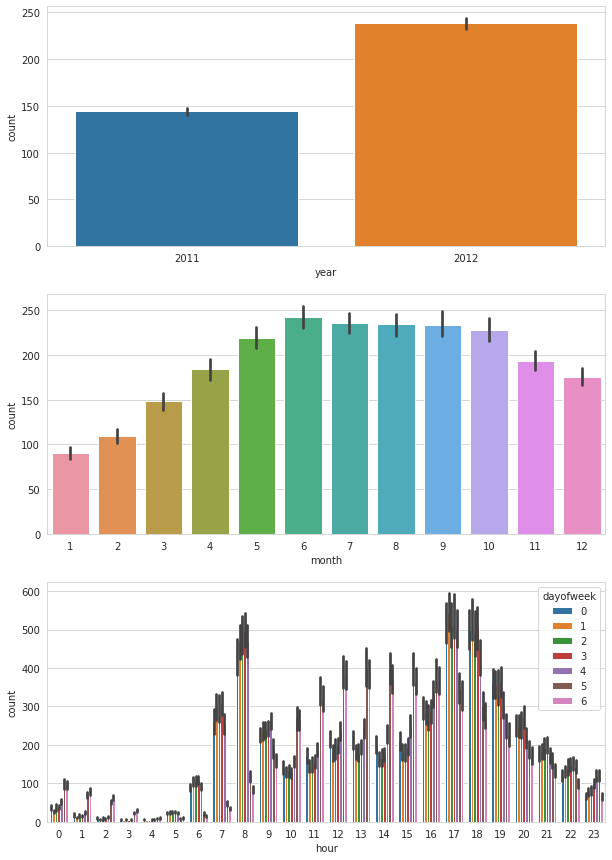

In [116]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10,15)
sns.barplot(data=train_data,x='year',y='count',ax=axes[0])
sns.barplot(data=train_data,x='month',y='count',ax=axes[1])
sns.barplot(data=train_data,x='hour',y='count',ax=axes[2], hue='dayofweek')

Hourly Count based on Working day or not working not

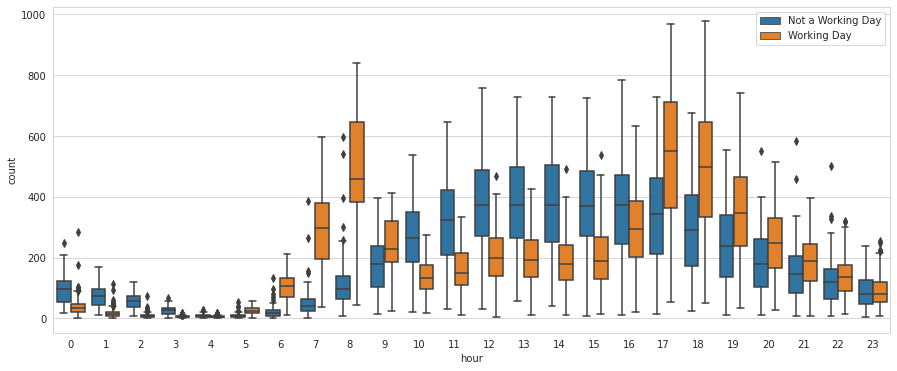

In [117]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=train_data, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

The Bar to see the relation between the count and weather, windspeed, humidity, temp individually

In [118]:
fig1 = px.bar(train_data, x="weather", y="count")
fig2 = px.bar(train_data, x="windspeed", y="count")
fig3 = px.bar(train_data, x="humidity", y="count")
fig4 = px.bar(train_data, x="temp", y="count")

fig1.update_traces(marker_line_width=0)
fig2.update_traces(marker_line_width=0)
fig3.update_traces(marker_line_width=0)
fig4.update_traces(marker_line_width=0)

fig1.show()
fig2.show()
fig3.show()
fig4.show()

Average Monthly Count Distribution of bikes on working and not working day

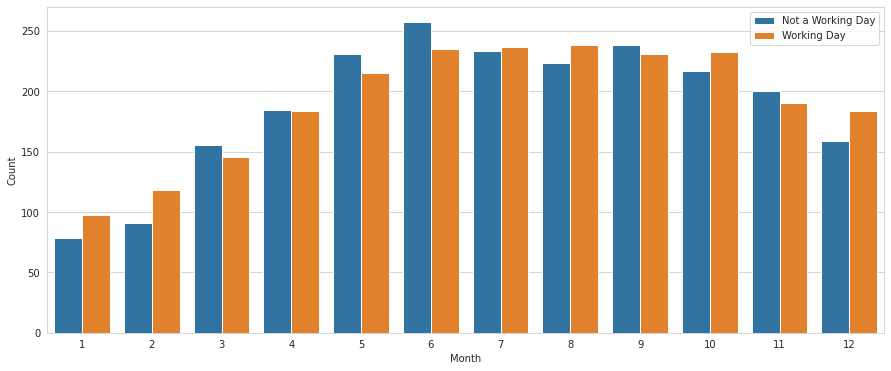

In [119]:

f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(train_data.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

<AxesSubplot:xlabel='count', ylabel='Count'>

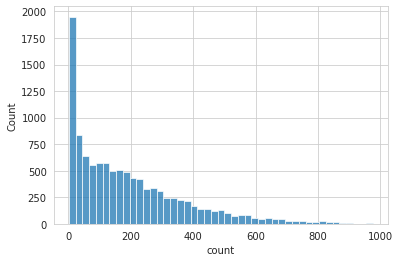

In [120]:
sns.histplot(train_data['count'])

In [121]:
train_data['count']= np.log1p(train_data['count'])

<AxesSubplot:xlabel='count', ylabel='Count'>

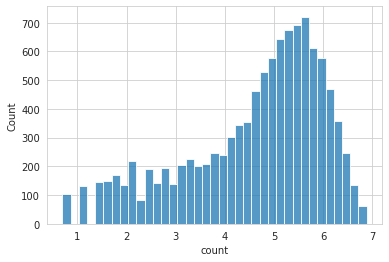

In [122]:
sns.histplot(train_data['count'])

In [123]:
train_data =train_data[np.abs(train_data['count'])-train_data['count'].mean()<=(3*train_data['count'].std())]

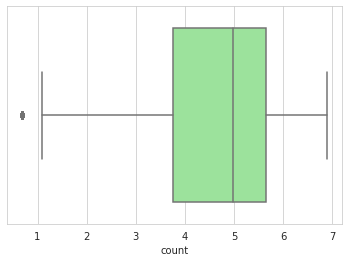

In [124]:
sns.boxplot(x='count',data=train_data, color='lightgreen')
plt.show()

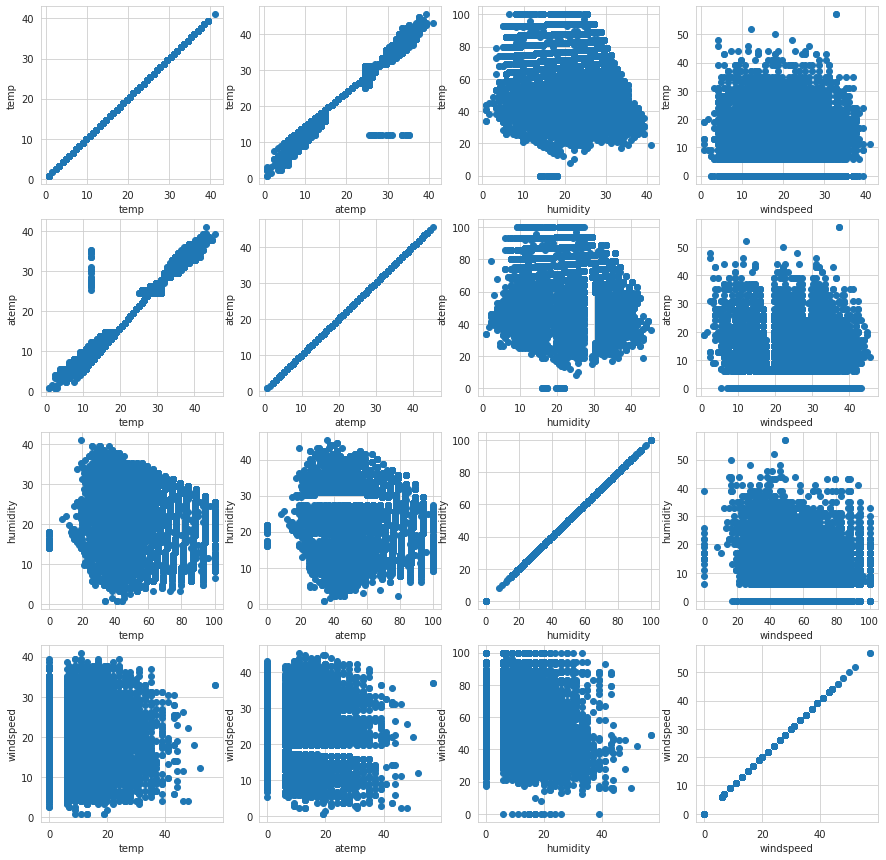

In [125]:
fig = plt.figure(figsize=(15,15))
for i,f1 in enumerate(fields):
    for j,f2 in enumerate(fields):
        idx =i*len(fields)+j+1
        ax=fig.add_subplot(len(fields),len(fields),idx)
        ax.scatter(train_data[f1],train_data[f2])
        ax.set_ylabel(f1)
        ax.set_xlabel(f2)
plt.show()

In [126]:
drop_idx = train_data[(train_data['atemp']>20) & (train_data['atemp']<40) & (train_data['temp']>10) & (train_data['temp']<20)].index
train_data= train_data.drop(drop_idx)

In [127]:
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
    scaler=MinMaxScaler()
    num_cols =['temp','atemp','humidity','windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [128]:
train_data =scaling(train_data)
test_data= scaling(test_data)

In [129]:
train_data.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
8965,3,0,1,1,0.693878,0.711825,0.61,0.193018,5.424950,2012,8,15,2,22
10074,4,0,1,2,0.285714,0.305068,0.56,0.263195,1.609438,2012,11,5,0,3
10564,4,0,1,1,0.285714,0.338964,0.42,0.105325,5.361292,2012,12,6,3,14
3936,3,0,1,1,0.632653,0.661036,0.69,0.193018,3.044522,2011,9,15,3,1
10801,4,0,0,2,0.346939,0.372860,0.87,0.157870,5.690359,2012,12,16,6,11


splititng the train and test data to train the model

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data.drop(['count'],axis=1),train_data['count'],test_size=0.3)

In [131]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    remsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [132]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [133]:
def evaluate(reg_cls,params=None):
    reg=reg_cls()
    if params:
        reg=GridSearchCV(reg,param_grid=params,refit = True)
    reg.fit(X_train,Y_train)
    pred=reg.predict(X_test)
    print(findmae(Y_test,pred))
    score =reg.score(X_test,Y_test)*100
    print(score)
    y_test_exp = np.expm1(Y_test)
    pred_exp=np.expm1(pred)
   
    print('\n',reg_cls)
    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print(rmsle(y_test_exp,pred_exp))
    return reg,pred_exp

In [134]:
from sklearn.metrics import mean_absolute_error as mae
def findmae(Y_test,pred):
    return mae(Y_test,pred)
    

Using few models to test the data to know which model is predicting good

In [135]:

print("--------LinearRegression--------")
lr_reg, pred_lr = evaluate(LinearRegression)
print("--------Ridge--------")
rg_reg, pred_rg = evaluate(Ridge)
print("--------Lasso--------")
ls_reg, pred_ls = evaluate(Lasso)
print("--------RandomForestRegressor--------")
rf_reg, pred_rf = evaluate(RandomForestRegressor)
print("--------GradientBoostingRegressor--------")
gb_reg, pred_gb = evaluate(GradientBoostingRegressor)
print("--------XGBRegressor--------")
xg_reg, pred_xg = evaluate(XGBRegressor)
print("--------LGBMRegressor--------")
lg_reg, pred_lg = evaluate(LGBMRegressor)

params ={'n_estimators':[100*i for i in range(1,6)]}

print("--------XGBRegressor--------")
xg_reg, pred_xg = evaluate(XGBRegressor, params)

print("--------LGBMRegressor--------")
lg_reg, pred_lg = evaluate(LGBMRegressor, params)





--------LinearRegression--------
0.7927068677745589
50.329955893474335

 <class 'sklearn.linear_model._base.LinearRegression'>
<function rmsle at 0x7f438d515320>
--------Ridge--------
0.7929597325700174
50.32739727952501

 <class 'sklearn.linear_model._ridge.Ridge'>
<function rmsle at 0x7f438d515320>
--------Lasso--------
0.9660108146503579
31.883419360530084

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
<function rmsle at 0x7f438d515320>
--------RandomForestRegressor--------
0.19939603274277268
95.73872811785846

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
<function rmsle at 0x7f438d515320>
--------GradientBoostingRegressor--------
0.2933708822841407
92.62879186461059

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
<function rmsle at 0x7f438d515320>
--------XGBRegressor--------
0.19487610274700667
95.939699398282

 <class 'xgboost.sklearn.XGBRegressor'>
<function rmsle at 0x7f438d515320>
--------LGBMRegressor--------
0.19256292651025986
96.1057508

In [136]:
def feature_importance(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df=pd.DataFrame(sorted(zip(X_train.columns,reg.feature_importances_)),columns=['features','values'])
    sns.barplot(x='values',y='features',data=df.sort_values(by='values',ascending=True))
    plt.show()

LGB Regressor is producing better results when compared with other models

<class 'lightgbm.sklearn.LGBMRegressor'>


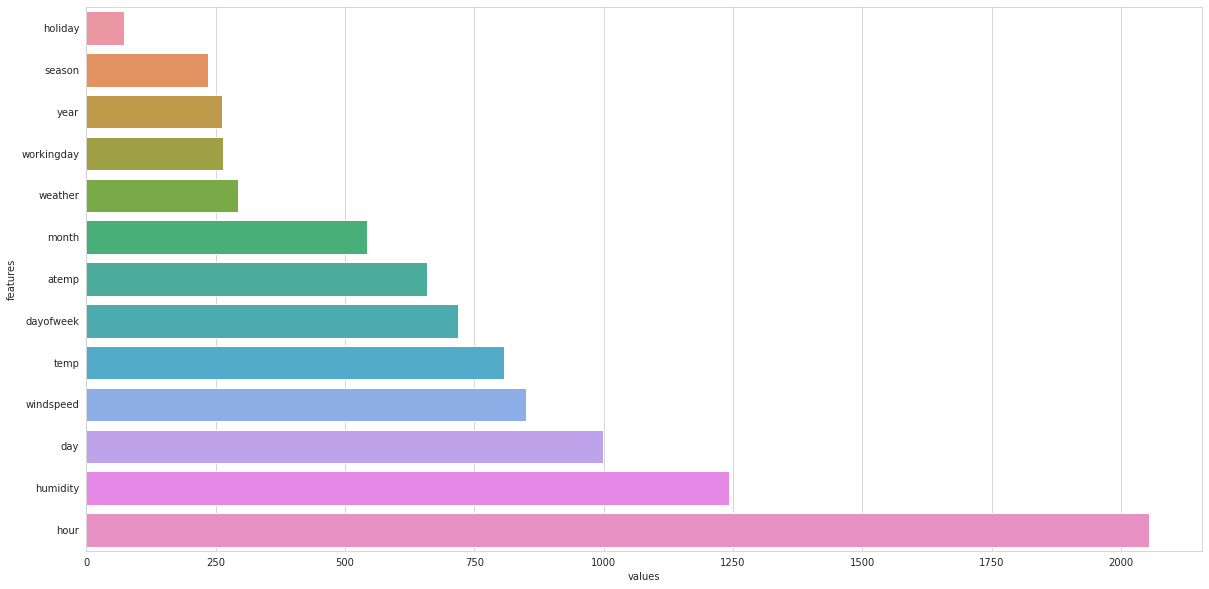

In [137]:
feature_importance(lg_reg)

reading the submission file to push the results into it.

In [4]:
submission = pd.read_csv('../Raw_data/sampleSubmission.csv')
submission.sample(5)

,datetime,count
3698,2012-02-27 21:00:00,0
2576,2011-10-27 21:00:00,0
6164,2012-11-29 05:00:00,0
5493,2012-09-22 17:00:00,0
3613,2012-02-24 08:00:00,0


In [140]:
test_data.shape

(6493, 13)

In [141]:
submission.shape

(6493, 2)

In [146]:
pred = lg_reg.predict(test_data)
pred_exp= np.expm1(pred)
print(pred_exp)

[ 11.12412963   4.47996402   3.32308622 ... 164.01685455 110.96412767
  53.7835222 ]


The result

In [147]:
submission.loc[:,'count']=pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,11.124130
1,2011-01-20 01:00:00,4.479964
2,2011-01-20 02:00:00,3.323086
3,2011-01-20 03:00:00,2.188135
4,2011-01-20 04:00:00,1.617486
...,...,...
6488,2012-12-31 19:00:00,263.943336
6489,2012-12-31 20:00:00,202.855966
6490,2012-12-31 21:00:00,164.016855
6491,2012-12-31 22:00:00,110.964128


In [148]:
submission.to_csv('../Results/Output.csv', sep='\t')